# Introduction to Importing Data in Python
Run the hidden code cell below to import the data used in this course.

In [4]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import h5py
from sas7bdat import SAS7BDAT
from sqlalchemy import create_engine
import pickle

# Import the course datasets
titanic = pd.read_csv("datasets/titanic_sub.csv")
battledeath_2002 = pd.ExcelFile("datasets/battledeath.xlsx").parse("2002")
engine = create_engine('sqlite:///datasets/Chinook.sqlite')
con = engine.connect()
rs = con.execute('SELECT * FROM Album')
chinook = pd.DataFrame(rs.fetchall())
seaslug = np.loadtxt("datasets/seaslug.txt", delimiter="\t", dtype=str)

ObjectNotExecutableError: Not an executable object: 'SELECT * FROM Album'


## Leitura de arquivo de texto 


In [5]:
filename = 'datasets/seaslug.txt'
file = open(filename, mode='r') # 'r' is to read
text = file.read()
file.close()
print(text)

Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
0	0.467
0	0.857
0	0.5
0	0.357
0	0.533
5	0.467
5	0.467
5	0.125
5	0.4
5	0.214
5	0.4
10	0.067
10	0.067
10	0.333
10	0.333
10	0.133
10	0.133
15	0.267
15	0.286
15	0.333
15	0.214
15	0
15	0
20	0.267
20	0.2
20	0.267
20	0.437
20	0.077
20	0.067
25	0.133
25	0.267
25	0.412
25	0
25	0.067
25	0.133
30	0
30	0.071
30	0
30	0.067
30	0.067
30	0.133


## Using context manger with
* good practice

In [6]:
with open('datasets/seaslug.txt', 'r') as file:
    print(file.read())

Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
0	0.467
0	0.857
0	0.5
0	0.357
0	0.533
5	0.467
5	0.467
5	0.125
5	0.4
5	0.214
5	0.4
10	0.067
10	0.067
10	0.333
10	0.333
10	0.133
10	0.133
15	0.267
15	0.286
15	0.333
15	0.214
15	0
15	0
20	0.267
20	0.2
20	0.267
20	0.437
20	0.077
20	0.067
25	0.133
25	0.267
25	0.412
25	0
25	0.067
25	0.133
30	0
30	0.071
30	0
30	0.067
30	0.067
30	0.133


# Importing flat files using NumPy

In [9]:
# importing txt file NumPy
filename = 'datasets/temperatures.txt'
data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=str)
print(data)

[['2023-08-01' '25.6' '78.1']
 ['2023-08-02' '24.8' '76.6']
 ['2023-08-03' '26.3' '79.3']
 ['2023-08-04' '27.5' '81.5']
 ['2023-08-05' '23.9' '75.0']]


# Importing flat files using Pandas

In [10]:
# importing csv file 
filename = 'datasets/temperatures.csv'
data = pd.read_csv(filename)
data.head()

,Data,Temp_C,Temp_F
0,2023-08-01,25.6,78.1
1,2023-08-02,24.8,76.6
2,2023-08-03,26.3,79.3
3,2023-08-04,27.5,81.5
4,2023-08-05,23.9,75.0


## Pickled file
There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

In [11]:
# open pickle file and load data
# 'rb' for r = read only, b = binary
with open('dados.pkl', 'rb') as file:
    d = pickle.load(file)
    
print(d)
print(type(d))

{'nome': 'João', 'idade': 30, 'cidade': 'Exemploville'}
<class 'dict'>


## Excel file

In [12]:
# Excel file
file = 'datasets/battledeath.xlsx'

# load 
xls = pd.ExcelFile(file)

# selecting sheet names
print(xls.sheet_names)

['2002', '2004']


## Load de sheet 2004 and 2002

In [13]:
df1 = xls.parse('2004')
print(df1.head())

df2 = xls.parse(0)
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


# Costumization Excel file

In [14]:
df1 = xls.parse(0, skiprows= [0], names= ['Country', 'AAM due to War (2002)'])
print(df1.head())

df2 = xls.parse(1, usecols= [0], skiprows= [0], names= ['Country'])
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


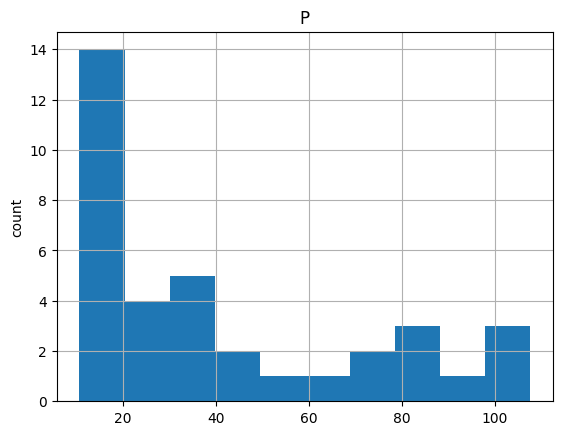

In [15]:
# saving file to a DataFrame
with SAS7BDAT('datasets/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()
    
print(df_sas.head())

pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

## Stata file

In [16]:
df = pd.read_stata('datasets/disarea.dta')

print(df.head())

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

## HDF5 file

In [17]:
# showing the keys from file
file = 'datasets/L-L1_LOSC_4_V1-1126259446-32.hdf5'

data = h5py.File(file, 'r')

print(type(data))
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


# Extracting data from HDF5

Strain


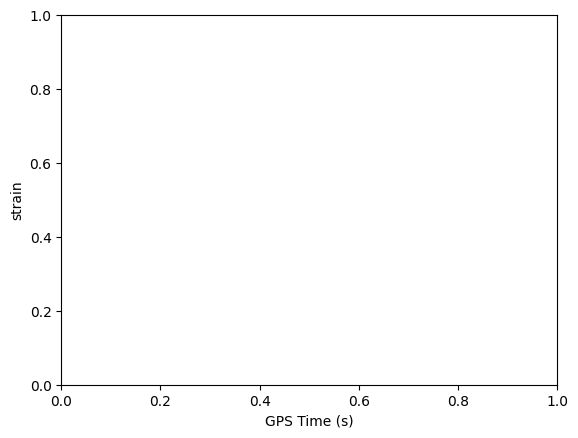

In [23]:
group = data['strain']

for key in group.keys():
    print(key)
    
strain = np.array(data['strain']['Strain'])
num_samples = 10000
time = np.arange(0, 1, 1/num_samples)

plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

## Creating a database engine 

In [7]:
engine = create_engine("sqlite:///home/thiago/Desktop/repoGit/datascience/data_camp_notebooks/data_science/introduction_to_importing_data/Chinook.sqlite")
con = engine.connect()
table_names = engine.table_names()
print(table_names)

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/20/e3q8)